In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from qutip import *
from scipy import optimize

def plot_wigner(psi, xvec, yvec, cbar = True, norm_amp = None):
    W = wigner(psi, xvec, yvec)
    wmap = wigner_cmap(W)  # Generate Wigner colormap
    if norm_amp == None:
        nrm = mpl.colors.Normalize(-W.max(), W.max())
    else:
        nrm = mpl.colors.Normalize(-norm_amp, norm_amp)
    fig, axes = plt.subplots(figsize=(5, 4))
    plt1 = axes.contourf(xvec, yvec, W, 100, cmap='RdBu_r', norm=nrm)
    if cabr: cb1 = fig.colorbar(plt1, ax=axes)
        
def plot_wigner_multi(psi_arr, xvec, yvec, cbar=True, norm_amp = None):
    l = len(psi_arr)
    fig = plt.figure(figsize=(16,3*(int(l/4)+1)))

    for kk, psi in enumerate(psi_arr):
        
        W = wigner(psi, xvec, yvec)
        wmap = wigner_cmap(W)  # Generate Wigner colormap
        if norm_amp == None:
            nrm = mpl.colors.Normalize(-W.max(), W.max())
        else:
            nrm = mpl.colors.Normalize(-norm_amp, norm_amp)
            
        ax = fig.add_subplot(int(l/4)+1,4,kk+1)
        plt1 = ax.contourf(xvec, yvec, W, 100, cmap='RdBu_r', norm=nrm)
        if cbar: fig.colorbar(plt1)

In [10]:
dim=25
psi_t = (0*fock(dim,0) + 0*fock(dim,1) + 1*fock(dim,2)).unit() # Target state

def snap(dim,n,theta):
    state = basis(dim,n)
    return (1j*theta*state*state.dag()).expm()

def compute_final_state(params):
    psi_f = basis(dim, 0) # Initital state
    for ii,param in enumerate(params[:-1]):
        psi_f = snap(dim,ii,pi)*displace(dim, param)*psi_f

    psi_f = displace(dim, params[-1])*psi_f
    return psi_f

def compute_final_state_not_good(params):
    psi_f = basis(dim, 0) # Initital state
    for ii,param in enumerate(params[:-1]):
        psi_f = displace(dim, param)*psi_f
        for jj in range(ii+1,0,-2): # SNAP gates on even and odd manifolds alternatively
            psi_f = snap(dim,jj-1,pi)*psi_f
#             print(ii,jj-1,param)

    psi_f = displace(dim, params[-1])*psi_f
    return psi_f

def cost_function(params):
    psi_f = compute_final_state(params)
#     psi_f = compute_final_state_complex(params)
    cost = 1 - fidelity(psi_t, psi_f)
    return cost

Convergence:  True
Displacements:  [ 0.49686221 -1.13306309  0.43234944] , Infidelity =  0.008982240140467668
Fidelity =  0.9910177598595323


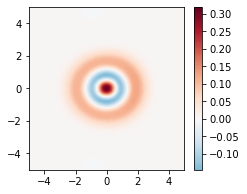

In [12]:
#%%time

val = 0.9
optvals = optimize.minimize(cost_function, np.array([val,-val,val]), method='L-BFGS-B')
# methods = ‘Nelder-Mead’ ‘Powell’ ‘CG’ ‘BFGS’ ‘Newton-CG’ ‘L-BFGS-B’ ‘TNC’ ‘COBYLA’ ‘SLSQP’ ‘dogleg’ ‘trust-ncg’

print("Convergence: ", optvals.success)
print("Displacements: ", optvals.x, ", Infidelity = ", cost_function(optvals.x))
print("Fidelity = ", 1-cost_function(optvals.x))
xvec = np.linspace(-5, 5, 200)
plot_wigner_multi([compute_final_state(optvals.x)],xvec,xvec)

## Plot coherent state population

Text(0, 0.5, 'Population')

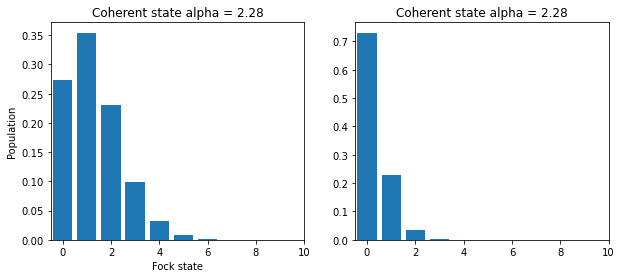

In [13]:
N = 20
alpha = 1.14
rho_coherent = coherent_dm(N, alpha)

fig, axes = plt.subplots(1, 2, figsize=(10,4))

bar0 = axes[0].bar(np.arange(0, N), rho_coherent.diag())
lbl0 = axes[0].set_title("Coherent state alpha = %s" %(2*alpha))
lim0 = axes[0].set_xlim([-.5, 10])
axes[0].set_xlabel('Fock state')
axes[0].set_ylabel('Population')

rho_coherent = coherent_dm(N, 1.14-0.58)
bar0 = axes[1].bar(np.arange(0, N), rho_coherent.diag())
lbl0 = axes[1].set_title("Coherent state alpha = %s" %(2*alpha))
lim0 = axes[1].set_xlim([-.5, 10])
axes[0].set_xlabel('Fock state')
axes[0].set_ylabel('Population')